In [ ]:
!kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
100% 432k/432k [00:00<00:00, 1.13MB/s]
100% 432k/432k [00:00<00:00, 1.13MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/housedata.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import xgboost as xg

In [ ]:
data=pd.read_csv("data.csv")

In [ ]:
print(data.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [ ]:
# Preprocessing
data.dropna(inplace=True)  # Handle missing values

In [ ]:
# Feature Engineering
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']

In [ ]:
# Select features and target variable
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'total_sqft']]
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model =xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Model score:", model.score(X_test, y_test))

Model score: 0.02244342759629847


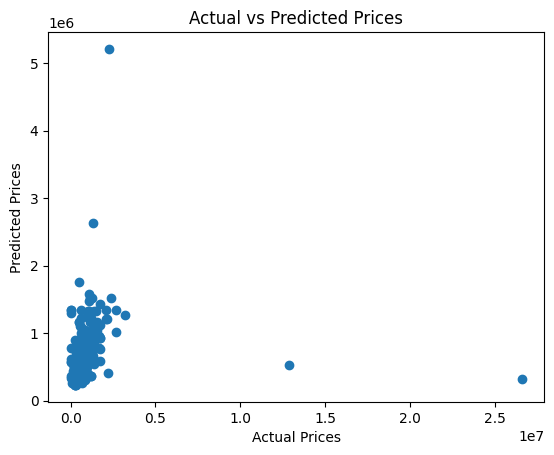

In [ ]:
# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()